In [1]:
import jax

In [2]:
jax.config.update("jax_enable_x64", True)

In [4]:
from tinygp import kernels

kernel = kernels.ExpSquared(scale=1.5)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


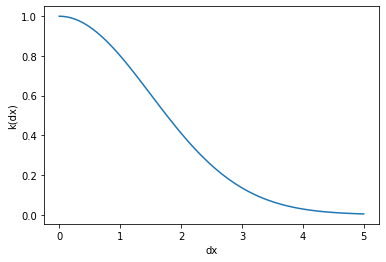

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def plot_kernel(kernel, **kwargs):
    dx = np.linspace(0, 5, 100)
    plt.plot(dx, kernel(dx, dx[:1]), **kwargs)
    plt.xlabel("dx")
    plt.ylabel("k(dx)")


plot_kernel(kernel)

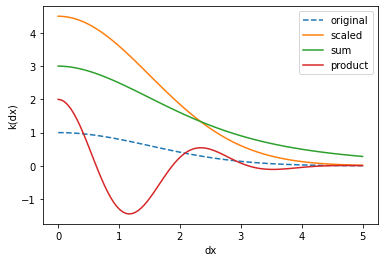

In [6]:
plot_kernel(kernel, label="original", ls="dashed")

kernel_scaled = 4.5 * kernels.ExpSquared(scale=1.5)
plot_kernel(kernel_scaled, label="scaled")

kernel_sum = kernels.ExpSquared(scale=1.5) + 2 * kernels.Matern32(scale=2.5)
plot_kernel(kernel_sum, label="sum")

kernel_prod = 2 * kernels.ExpSquared(scale=1.5) * kernels.Cosine(scale=2.5)
plot_kernel(kernel_prod, label="product")

_ = plt.legend()

In [7]:
from tinygp import GaussianProcess

In [8]:
X = np.sort(np.random.default_rng(1).uniform(0, 10, 100))

In [9]:
gp = GaussianProcess(kernel, X)

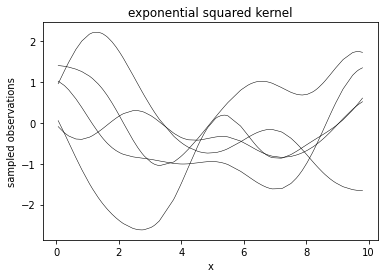

In [10]:
y = gp.sample(jax.random.PRNGKey(4), shape=(5,))
plt.plot(X, y.T, color="k", lw=0.5)
plt.xlabel("x")
plt.ylabel("sampled observations")
_ = plt.title("exponential squared kernel")